In [1]:
pip install tifffile


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install imagecodecs


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 3.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


Image shape: (1316, 2457)


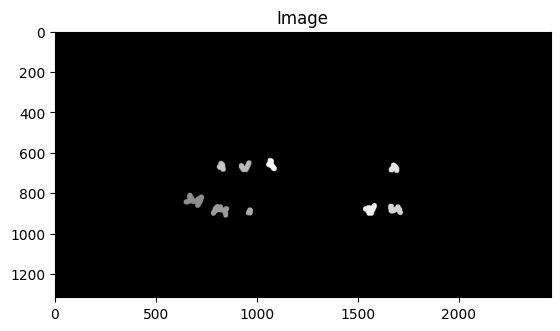

In [2]:
import tifffile as tiff
import matplotlib.pyplot as plt

# Load the OME-TIFF file
image_path = '21_M_SAKTHIVEL_20220822_115401_1_pulp.ome.tiff'
img = tiff.imread(image_path)

# Display information about the image
print(f"Image shape: {img.shape}")  # e.g., (height, width, channels)

# If the image has multiple channels, you can inspect and visualize each channel
if len(img.shape) == 3:  # For multi-channel images
    for i in range(img.shape[2]):
        plt.imshow(img[:, :, i], cmap='gray')
        plt.title(f'Channel {i}')
        plt.show()
else:  # If it's a single-channel image
    plt.imshow(img, cmap='gray')
    plt.title('Image')
    plt.show()


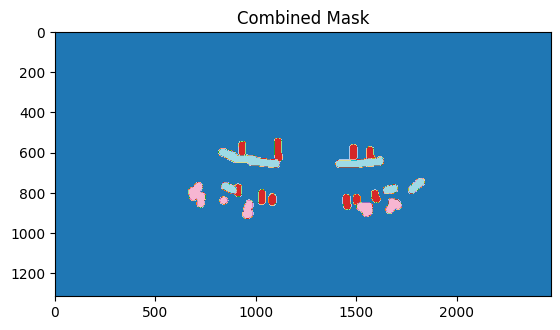

In [7]:
import tifffile as tiff
import numpy as np
import matplotlib.pyplot as plt

# Paths to the different mask files
background_mask_path = '15_M_KARTHIKEYAN_VISHAL_20220919_113554_background.ome.tiff'
cavity_mask_path = '15_M_KARTHIKEYAN_VISHAL_20220919_113554_cavity.ome.tiff'
pulp_mask_path = '15_M_KARTHIKEYAN_VISHAL_20220919_113554_pulp.ome.tiff'
restoration_mask_path = '15_M_KARTHIKEYAN_VISHAL_20220919_113554_restoration.ome.tiff'

# Load each mask
background_mask = tiff.imread(background_mask_path)
cavity_mask = tiff.imread(cavity_mask_path)
pulp_mask = tiff.imread(pulp_mask_path)
restoration_mask = tiff.imread(restoration_mask_path)

# Ensure all masks are of the same shape
assert background_mask.shape == cavity_mask.shape == pulp_mask.shape == restoration_mask.shape

# Initialize a combined mask with zeros (background)
combined_mask = np.zeros_like(background_mask, dtype=np.uint8)

# Assign unique values for each mask
combined_mask[background_mask > 0] = 0  # Background, usually 0, so this is redundant
combined_mask[cavity_mask > 0] = 1      # Cavity
combined_mask[pulp_mask > 0] = 2        # Pulp
combined_mask[restoration_mask > 0] = 3 # Restoration

# Display the combined mask
plt.imshow(combined_mask, cmap='tab20')  # 'tab20' will show different regions in different colors
plt.title('Combined Mask')
plt.show()

# Save the combined mask as a TIFF or PNG file if needed
tiff.imwrite('combined_mask.tiff', combined_mask)


In [15]:
import os
import shutil

def find_jpg_files_and_copy(root_directory, destination_directory):
    all_jpg_files = []

    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Walk through the directory tree
    for dirpath, dirnames, filenames in os.walk(root_directory):
        for file_name in filenames:
            # Get the full path of the file
            file_path = os.path.join(dirpath, file_name)

            # Check if the file ends with '.jpg' (case insensitive)
            if file_name.lower().endswith('.jpg'):
                print(f"Found: {file_path}")
                all_jpg_files.append(file_path)

                # Copy the jpg file to the destination folder
                destination_file_path = os.path.join(destination_directory, file_name)
                shutil.copy(file_path, destination_file_path)
                print(f"Copied to: {destination_file_path}")

    return all_jpg_files

# Example usage
root_directory = "/Users/krishna/Downloads/RVGS-3"
destination_directory = "/Users/krishna/Downloads/copied_jpg_files"
result = find_jpg_files_and_copy(root_directory, destination_directory)

print("\nTotal JPG files found and copied:", len(result))


Found: /Users/krishna/Downloads/RVGS-3/SHANWAZ_3477/DigX_09022017_131858.AutoStamp.jpg
Copied to: /Users/krishna/Downloads/copied_jpg_files/DigX_09022017_131858.AutoStamp.jpg
Found: /Users/krishna/Downloads/RVGS-3/SHANWAZ_3477/DigX_09022017_131727.AutoStamp.jpg
Copied to: /Users/krishna/Downloads/copied_jpg_files/DigX_09022017_131727.AutoStamp.jpg
Found: /Users/krishna/Downloads/RVGS-3/SAIMA_3471/DigX_08292017_110545.AutoStamp.jpg
Copied to: /Users/krishna/Downloads/copied_jpg_files/DigX_08292017_110545.AutoStamp.jpg
Found: /Users/krishna/Downloads/RVGS-3/SAIMA_3471/DigX_08292017_110442.AutoStamp.jpg
Copied to: /Users/krishna/Downloads/copied_jpg_files/DigX_08292017_110442.AutoStamp.jpg
Found: /Users/krishna/Downloads/RVGS-3/YASHODHRA_3456/DigX_08122017_152025.AutoStamp.jpg
Copied to: /Users/krishna/Downloads/copied_jpg_files/DigX_08122017_152025.AutoStamp.jpg
Found: /Users/krishna/Downloads/RVGS-3/RITIK_4188/DigX_09222020_121909.AutoStamp.jpg
Copied to: /Users/krishna/Downloads/copied

In [19]:
import os
import shutil

def find_jpg_files_and_copy(root_directory, destination_directory, min_size_kb=100):
    all_jpg_files = []
    min_size_bytes = min_size_kb * 1024  # Convert KB to bytes

    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_directory):
        os.makedirs(destination_directory)

    # Walk through the directory tree
    for dirpath, dirnames, filenames in os.walk(root_directory):
        for file_name in filenames:
            # Get the full path of the file
            file_path = os.path.join(dirpath, file_name)

            # Check if the file ends with '.jpg' (case insensitive)
            if file_name.lower().endswith('.jpg'):
                # Get the file size
                file_size = os.path.getsize(file_path)

                # Only process if the file is greater than 100 KB
                if file_size > min_size_bytes:
                    print(f"Found: {file_path} ({file_size / 1024:.2f} KB)")
                    all_jpg_files.append(file_path)

                    # Copy the jpg file to the destination folder
                    destination_file_path = os.path.join(destination_directory, file_name)
                    shutil.copy(file_path, destination_file_path)
                    print(f"Copied to: {destination_file_path}")
                else:
                    print(f"Skipped: {file_path} ({file_size / 1024:.2f} KB) - File size is less than {min_size_kb} KB")

    return all_jpg_files

# Example usage
root_directory = "/Users/krishna/Downloads/RVGS"
destination_directory = "/Users/krishna/Downloads/copied_jpg_files"
result = find_jpg_files_and_copy(root_directory, destination_directory)

print("\nTotal JPG files found and copied:", len(result))


Found: /Users/krishna/Downloads/RVGS/ASFA_1734/DigX_09272009_173146.jpg (224.90 KB)
Copied to: /Users/krishna/Downloads/copied_jpg_files/DigX_09272009_173146.jpg
Skipped: /Users/krishna/Downloads/RVGS/ASFA_1734/DigX_09272009_173146.jpgStamp.jpg (7.60 KB) - File size is less than 100 KB
Skipped: /Users/krishna/Downloads/RVGS/AHARIVARH_282/DigX_03072006_203330.AutoStamp.jpg (5.60 KB) - File size is less than 100 KB
Found: /Users/krishna/Downloads/RVGS/AHARIVARH_282/DigX_01112015_114936.jpg (735.63 KB)
Copied to: /Users/krishna/Downloads/copied_jpg_files/DigX_01112015_114936.jpg
Found: /Users/krishna/Downloads/RVGS/AHARIVARH_282/DigX_01112015_130112.jpg (974.54 KB)
Copied to: /Users/krishna/Downloads/copied_jpg_files/DigX_01112015_130112.jpg
Skipped: /Users/krishna/Downloads/RVGS/AHARIVARH_282/DigX_04232014_185544.jpgStamp.jpg (9.59 KB) - File size is less than 100 KB
Skipped: /Users/krishna/Downloads/RVGS/AHARIVARH_282/DigX_01112015_124435.jpgStamp.jpg (5.09 KB) - File size is less than 

In [8]:
import gspread
from google.oauth2.service_account import Credentials

# Define the scope
scope = ["https://www.googleapis.com/auth/spreadsheets",
         "https://www.googleapis.com/auth/drive"]

# Load the credentials
creds = Credentials.from_service_account_file('/Users/krishna/Desktop/Shlome_research_lab/sheets-435420-01db2ff57fc4.json', scopes=scope)

# Authenticate and create the client
client = gspread.authorize(creds)

# List all spreadsheets accessible to the service account
spreadsheets = client.openall()

# Iterate through each spreadsheet
for sheet in spreadsheets:
    print(f"Spreadsheet Title: {sheet.title}")
    
    # Get all sheets within the spreadsheet
    worksheets = sheet.worksheets()
    
    # Iterate through each worksheet in the spreadsheet
    for worksheet in worksheets:
        print(f"  Sheet Title: {worksheet.title}")
        
        # Get all values from the sheet without treating the first row as headers
        data = worksheet.get_all_values()
        
        # Print data from the sheet
        print(f"    Data from {worksheet.title}:")
        for row in data:
            print(row)


Spreadsheet Title: Box Printing Data
  Sheet Title: DIE DETAILS
    Data from DIE DETAILS:
['DETAILS OF DIE', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '']
['DIE GBI01', 'cement box', 'cement box', 'cement box', '15ml box', '15ml box', '15ml box', '15ml box', 'syringe box', '']
['DIE GBI02', 'sponge', 'sponge', 'cement box', '15ml box', 'temp paste', '', '', 'syringe box', '']
['DIE GBI03', 'sponge', 'cement box', 'cement box', 'temp paste', 'temp paste', '', 'syringe box', '', '']
['', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '']
['No. of Boxes/Sheet', '8', '6', '7', '7', '4', '5', '7', '7', '6']
['BOX/DIE TYPE', 'DIE GBI01', 'DIE GBI02', 'DIE GBI03', 'DIE GBI04', 'DIE GBI05', 'DIE GBI06', 'DIE GBI07', 'DIE GBI08', 'DIE GBI09']
['CEMENT', '3', '1', '2', '', '', '3', '', '1', '']
['15ML', '4', '1', '0', '1', '', '', '', '1', '']
['SYRINGE', '1', '1', '1', '', '1', '', '', '3', '2']
[

In [21]:
pip install gspread


Note: you may need to restart the kernel to use updated packages.


In [10]:
import gspread
from google.oauth2.service_account import Credentials

# Define the scope
scope = ["https://www.googleapis.com/auth/spreadsheets",
         "https://www.googleapis.com/auth/drive"]

# Load the credentials
creds = Credentials.from_service_account_file('/Users/krishna/Desktop/Shlome_research_lab/sheets-435420-01db2ff57fc4.json', scopes=scope)

# Authenticate and create the client
client = gspread.authorize(creds)

# List all spreadsheets accessible to the service account
spreadsheets = client.openall()

# Define the specific sheet name you're looking for
specific_sheet_name = "JOB DETAILS"

# Iterate through each spreadsheet
for sheet in spreadsheets:
    print(f"Spreadsheet Title: {sheet.title}")
    
    # Get all sheets within the spreadsheet
    worksheets = sheet.worksheets()
    
    # Iterate through each worksheet in the spreadsheet
    for worksheet in worksheets:
        print(f"  Sheet Title: {worksheet.title}")
        
        if worksheet.title == specific_sheet_name:
            # Get all values from the sheet without treating the first row as headers
            data = worksheet.get_all_values()
            
            # Print data from the sheet
            print(f"    Data from {worksheet.title}:")
            for row in data:
                print(row)


Spreadsheet Title: Box Printing Data
  Sheet Title: DIE DETAILS
  Sheet Title: JOB DETAILS
    Data from JOB DETAILS:
['08-07-24', 'JOB 2', 'DIE GBI01 rcd on 17/07/24', '', 'JOB 2', 'RCD ON 16/07/24', 'DIE GBI01', '', '', 'JOB 3', 'DIE GBI02 RCD on 03/08/24', '', '']
['PYRAX', 'GIC 2', 'EGUINOL 15ML', '', '', '', '', '', '', '', '', '', '']
['PYRAX PERU', 'EGUINOL 15ML', 'EGUINOL 15ML', '', 'EGUINOL 20ML', 'EGUINOL 20ML', 'EGUINOL 20ML', '', '', '', '', '', '']
['DK', 'ENDO X', 'KRIS SHEILD+', 'krisdye', '', '', '', '', '', 'CAL LC+', '', 'HAEMOSPONGE', '']
['GT', 'LC GIC 2', '', '', 'ENDO X', 'INSTA RELIEF', 'NANOFIL SYRINGE', 'SILIONOMER', 'POLY CARBO+', 'TEMP PASTE', 'GI CLOT', 'HAEMOSPONGE', 'GIC TYPE 2']
['', '', '', '', '', '', '', '', '', '', '', '', '']
['', '', '', '', '', '', '', '', '', '', '', '', '']
['11-07-24/14-07-24', 'JOB4', 'DIE4 RCD ON 17/07/24', '', 'JOB5', 'DIE5Rcd on 17/07/24', 'JOB6', 'DIE GBI03 03/08/24', 'JOB 7', '', 'DIE 6', '', '']
['DK', '', '', '', '', '',

In [23]:
import gspread
from google.oauth2.service_account import Credentials
import mysql.connector

# Define the scope
scope = ["https://www.googleapis.com/auth/spreadsheets",
         "https://www.googleapis.com/auth/drive"]

# Load the credentials
creds = Credentials.from_service_account_file('/Users/krishna/Desktop/Shlome_research_lab/sheets-435420-01db2ff57fc4.json', scopes=scope)

# Authenticate and create the client
client = gspread.authorize(creds)

# Connect to MySQL
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="kv0309//",  # Ensure this is correct
    database="llm"
)
cursor = db.cursor()

# Define the specific sheet -tesname you're looking for
specific_sheet_name = "sheet1"

# List all spreadsheets accessible to the service account
spreadsheets = client.openall()

# Iterate through each spreadsheet
for sheet in spreadsheets:
    print(f"Spreadsheet Title: {sheet.title}")
    
    # Get all sheets within the spreadsheet
    worksheets = sheet.worksheets()
    
    # Iterate through each worksheet in the spreadsheet
    for worksheet in worksheets:
        if worksheet.title == specific_sheet_name:
            print(f"  Sheet Title: {worksheet.title}")
            
            # Get all values from the sheet without treating the first row as headers
            data = worksheet.get_all_values()
            
            # Assuming the first row contains column names
            columns = [col.replace(' ', '_').replace('-', '_') for col in data[0]]  # Clean column names
            values = data[1:]
            
            # Prepare SQL query to insert data
            placeholders = ', '.join(['%s'] * len(columns))
            sql = f"INSERT INTO your_table ({', '.join(columns)}) VALUES ({placeholders})"
            
            # Print SQL query for debugging
            print(f"SQL Query: {sql}")
            
            # Insert data into MySQL
            for row in values:
                try:
                    cursor.execute(sql, row)
                except mysql.connector.Error as err:
                    print(f"Error: {err}")
                    print(f"Row Data: {row}")
            
            # Commit the changes
            db.commit()

# Close the cursor and connection
cursor.close()
db.close()


Spreadsheet Title: sheet_test
Spreadsheet Title: International Sales Sheet 2024-25
Spreadsheet Title: Box Printing Data


In [37]:
import pandas as pd
import mysql.connector
import gspread
from google.oauth2.service_account import Credentials

# MySQL connection setup
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="kv0309//",  # Ensure this is correct
    database="llm"
)
cursor = db.cursor()


# Define the scope
scope = ["https://www.googleapis.com/auth/spreadsheets",
         "https://www.googleapis.com/auth/drive"]

# Load the credentials
creds = Credentials.from_service_account_file('/Users/krishna/Desktop/Shlome_research_lab/sheets-435420-01db2ff57fc4.json', scopes=scope)



client = gspread.authorize(creds)

# List of Google Sheets IDs to process (replace with your sheet IDs)
google_sheets_ids = [
    '1n7ClTyT3t7YBcD-hOQoHZVqUKkSsVP4bEIlEENrUCag',
    '1Uqi25rzJAsDLWsbHF4digt_kz1YB7nl2VymljupwST4'
]

# Function to create MySQL table
def create_table(table_name, columns):
    columns_def = ", ".join([f"`{col}` TEXT" for col in columns])  # Define columns as TEXT for simplicity
    sql = f"CREATE TABLE IF NOT EXISTS `{table_name}` ({columns_def})"
    cursor.execute(sql)

# Function to insert data into MySQL
def insert_data(table_name, columns, data):
    placeholders = ', '.join(['%s'] * len(columns))
    sql = f"INSERT INTO `{table_name}` ({', '.join(columns)}) VALUES ({placeholders})"
    
    for row in data:
        cursor.execute(sql, tuple(row))

# Process each Google Sheet
for sheet_id in google_sheets_ids:
    # Open the Google Sheet by ID
    spreadsheet = client.open_by_key(sheet_id)
    
    # Iterate through each worksheet (sheet) in the Google Sheet
    for worksheet in spreadsheet.worksheets():
        sheet_name = worksheet.title
        print(f"Processing sheet: {sheet_name} from Google Sheet ID: {sheet_id}")
        
        # Get all values from the sheet
        data = worksheet.get_all_values()
        
        # Convert data to DataFrame (first row as columns, rest as data)
        df = pd.DataFrame(data[1:], columns=data[0])
        
        # Clean column names (replace spaces or special characters with underscores)
        df.columns = [col.replace(' ', '_').replace('-', '_') for col in df.columns]
        
        # Create table in MySQL (table name based on sheet name)
        table_name = sheet_name.replace(' ', '_')  # Clean table name
        create_table(table_name, df.columns)
        
        # Insert data into the table
        insert_data(table_name, df.columns, df.values)
        
        # Commit the changes to the database
        db.commit()

# Close the cursor and the connection
cursor.close()
db.close()


Processing sheet: Sheet1 from Google Sheet ID: 1n7ClTyT3t7YBcD-hOQoHZVqUKkSsVP4bEIlEENrUCag
Processing sheet: Sheet1 from Google Sheet ID: 1Uqi25rzJAsDLWsbHF4digt_kz1YB7nl2VymljupwST4


ProgrammingError: 1054 (42S22): Unknown column 'Category_3' in 'field list'

In [41]:
import pandas as pd
import mysql.connector
import gspread
from google.oauth2.service_account import Credentials

# MySQL connection setup
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="kv0309//",  # Ensure this is correct
    database="llm"
)
cursor = db.cursor()

# Define the scope
scope = ["https://www.googleapis.com/auth/spreadsheets",
         "https://www.googleapis.com/auth/drive"]

# Load the credentials
creds = Credentials.from_service_account_file('/Users/krishna/Desktop/Shlome_research_lab/sheets-435420-01db2ff57fc4.json', scopes=scope)

client = gspread.authorize(creds)

# List of Google Sheets IDs to process
google_sheets_ids = [
    '1n7ClTyT3t7YBcD-hOQoHZVqUKkSsVP4bEIlEENrUCag',
    '1Uqi25rzJAsDLWsbHF4digt_kz1YB7nl2VymljupwST4'
]

# Function to create MySQL table dynamically based on DataFrame columns
def create_table(table_name, columns):
    # Define columns as TEXT for simplicity
    columns_def = ", ".join([f"`{col}` TEXT" for col in columns])
    sql = f"CREATE TABLE IF NOT EXISTS `{table_name}` ({columns_def})"
    print(f"Creating table with SQL: {sql}")  # Debug: Print SQL statement
    cursor.execute(sql)

# Function to insert data into MySQL
def insert_data(table_name, columns, data):
    # Prepare SQL statement for insertion
    placeholders = ', '.join(['%s'] * len(columns))
    sql = f"INSERT INTO `{table_name}` ({', '.join([f'`{col}`' for col in columns])}) VALUES ({placeholders})"
    print(f"Inserting data with SQL: {sql}")  # Debug: Print SQL statement
    
    for row in data:
        try:
            cursor.execute(sql, tuple(row))
        except mysql.connector.Error as err:
            print(f"Error: {err}")  # Debug: Print any error during execution

# Process each Google Sheet
for sheet_id in google_sheets_ids:
    # Open the Google Sheet by ID
    spreadsheet = client.open_by_key(sheet_id)
    
    # Iterate through each worksheet (sheet) in the Google Sheet
    for worksheet in spreadsheet.worksheets():
        sheet_name = worksheet.title
        print(f"Processing sheet: {sheet_name} from Google Sheet ID: {sheet_id}")
        
        # Get all values from the sheet
        data = worksheet.get_all_values()
        print(data)
        
        # Convert data to DataFrame (first row as columns, rest as data)
        df = pd.DataFrame(data[1:], columns=data[0])
        
        # Clean column names (replace spaces or special characters with underscores)
        df.columns = [col.replace(' ', '_').replace('-', '_') for col in df.columns]
        print(f"DataFrame columns: {df.columns}")  # Debug: Print column names
        
        # Create table in MySQL (table name based on sheet name)
        table_name = sheet_name.replace(' ', '_').replace('-', '_')
        create_table(table_name, df.columns)
        
        # Insert data into the table
        insert_data(table_name, df.columns, df.values)
        
        # Commit the changes to the database
        db.commit()

# Close the cursor and the connection
cursor.close()
db.close()


Processing sheet: Sheet1 from Google Sheet ID: 1n7ClTyT3t7YBcD-hOQoHZVqUKkSsVP4bEIlEENrUCag
[['Country', 'Category 1', 'Category 2', 'Label'], ['Dubai', 'Manufacturing', 'Trading', 'Dentakris Label'], ['Tanzania', 'Manufacturing', 'Trading', 'Dentakris Label'], ['Kenya', 'Trading', 'Import', 'Dentakris Label'], ['Zimbabwe', 'Manufacturing', 'Export', 'Dentakris Label'], ['Azerbaijan', 'Export', 'Trading', 'Dentakris Label'], ['Uganda', 'Manufacturing', 'Retail', 'Dentakris Label'], ['Lebanon', 'Trading', 'Import', 'Dentakris Label'], ['Kosovo', 'Manufacturing', 'Trading', 'Dentakris Label'], ['Canada', 'Retail', 'Export', 'Dentakris Label'], ['Rwanda', 'Manufacturing', 'Trading', 'Dentakris Label'], ['Somalia', 'Manufacturing', 'Trading', 'Dentakris Label'], ['Vietnam', 'Export', 'Manufacturing', 'Dentakris Label']]
DataFrame columns: Index(['Country', 'Category_1', 'Category_2', 'Label'], dtype='object')
Creating table with SQL: CREATE TABLE IF NOT EXISTS `Sheet1` (`Country` TEXT, `Ca

In [55]:
import pandas as pd
import mysql.connector
import gspread
from google.oauth2.service_account import Credentials
import time

# MySQL connection setup
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="kv0309//",  # Ensure this is correct
    database="llm"
)
cursor = db.cursor()

# Define the scope
scope = ["https://www.googleapis.com/auth/spreadsheets", "https://www.googleapis.com/auth/drive"]

# Load the credentials



creds = Credentials.from_service_account_file('/Users/krishna/Desktop/Shlome_research_lab/sheets-435420-01db2ff57fc4.json', scopes=scope)



client = gspread.authorize(creds)

# List of Google Sheets IDs to process (replace with your sheet IDs)
google_sheets_ids = [
    '1n7ClTyT3t7YBcD-hOQoHZVqUKkSsVP4bEIlEENrUCag',
    '1Uqi25rzJAsDLWsbHF4digt_kz1YB7nl2VymljupwST4'
]


# Function to create MySQL table
def create_table(table_name, columns):
    # Escape column names
    columns_def = ", ".join([f"`{col}` TEXT" for col in columns])
    sql = f"CREATE TABLE IF NOT EXISTS `{table_name}` ({columns_def})"
    cursor.execute(sql)

# Function to insert data into MySQL
def insert_data(table_name, columns, data):
    placeholders = ', '.join(['%s'] * len(columns))
    sql = f"INSERT INTO `{table_name}` ({', '.join([f'`{col}`' for col in columns])}) VALUES ({placeholders})"
    print(sql)
    
    for row in data:
        cursor.execute(sql, tuple(row))

# Retry wrapper function
def retry_request(func, *args, retries=3, delay=5):
    for attempt in range(retries):
        try:
            return func(*args)
        except (gspread.exceptions.APIError, Exception) as e:
            print(f"Error: {e}. Retrying in {delay} seconds...")
            time.sleep(delay)
    raise Exception(f"Failed after {retries} retries.")

# Process each Google Sheet
for sheet_id in google_sheets_ids:
    # Open the Google Sheet by ID
    spreadsheet = retry_request(client.open_by_key, sheet_id)
    
    # Iterate through each worksheet (sheet) in the Google Sheet
    for worksheet in spreadsheet.worksheets():
        sheet_name = worksheet.title
        print(f"Processing sheet: {sheet_name} from Google Sheet ID: {sheet_id}")
        
        # Get all values from the sheet
        data = worksheet.get_all_values()
        
        # Convert data to DataFrame (first row as columns, rest as data)
        df = pd.DataFrame(data[1:], columns=data[0])
          
        # Clean column names (replace spaces or special characters with underscores)
        df.columns = [col.replace(' ', '_').replace('-', '_').replace('/', '_') for col in df.columns]
        
        # Create a unique table name using the sheet name and part of the Google Sheets ID
        table_name = f"{sheet_name}_{sheet_id[:5]}".replace(' ', '_').replace('-', '_')
        
        # Create table in MySQL (table name based on sheet name and partial sheet ID)
        create_table(table_name, df.columns)
        
        # Insert data into the table
        insert_data(table_name, df.columns, df.values)
        
        # Commit the changes to the database
        db.commit()


Processing sheet: Sheet1 from Google Sheet ID: 1n7ClTyT3t7YBcD-hOQoHZVqUKkSsVP4bEIlEENrUCag
INSERT INTO `Sheet1_1n7Cl` (`Country`, `Category_1`, `Category_2`, `Label`) VALUES (%s, %s, %s, %s)
Processing sheet: Sheet1 from Google Sheet ID: 1Uqi25rzJAsDLWsbHF4digt_kz1YB7nl2VymljupwST4
INSERT INTO `Sheet1_1Uqi2` (`id`, `age`, `marks`) VALUES (%s, %s, %s)


In [33]:
pip install google-cloud-sql-connector pymysql sqlalchemy gspread pandas google-auth


ERROR: Could not find a version that satisfies the requirement google-cloud-sql-connector (from versions: none)
ERROR: No matching distribution found for google-cloud-sql-connector
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install cloud-sql-python-connector



Note: you may need to restart the kernel to use updated packages.


In [13]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/krishna/Desktop/Shlome_research_lab/mysql-435509-7225659bfe4d.json"


In [8]:
%pip install google-cloud-sql



ERROR: Could not find a version that satisfies the requirement google-cloud-sql (from versions: none)
ERROR: No matching distribution found for google-cloud-sql
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
import certifi

# Set the SSL_CERT_FILE environment variable
os.environ['SSL_CERT_FILE'] = certifi.where()

In [11]:
from google.cloud.sql.connector import Connector
import sqlalchemy

# initialize Connector object
connector = Connector()

# function to return the database connection
def getconn() -> pymysql.connections.Connection:
    conn: pymysql.connections.Connection = connector.connect(
        "mysql-435509:asia-south2:mydb2024",
        "pymysql",
        user="root",
        password="kv0309//",
        db="mydb2024"
    )
    return conn

# create connection pool
pool = sqlalchemy.create_engine(
    "mysql+pymysql://",
    creator=getconn,
)


# insert statement
insert_stmt = sqlalchemy.text(
    "INSERT INTO my_table (id, title) VALUES (:id, :title)",
)

with pool.connect() as db_conn:
    # insert into database
    db_conn.execute(insert_stmt, parameters={"id": "book1", "title": "Book One"})

    # query database
    result = db_conn.execute(sqlalchemy.text("SELECT * from my_table")).fetchall()

    # commit transaction (SQLAlchemy v2.X.X is commit as you go)
    db_conn.commit()

    # Do something with the results
    for row in result:
        print(row)
        
connector.close()

['mysql-435509:asia-south2:mydb2024']: An error occurred while performing refresh. Scheduling another refresh attempt immediately
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/aiohttp/connector.py", line 1025, in _wrap_create_connection
    return await self._loop.create_connection(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1106, in create_connection
    transport, protocol = await self._create_connection_transport(
                          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/base_events.py", line 1139, in _create_connection_transport
    await waiter
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/asyncio/sslproto.py", line 574, in _on_handshake_complete
    

ClientConnectorCertificateError: Cannot connect to host sqladmin.googleapis.com:443 ssl:True [SSLCertVerificationError: (1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:992)')]

In [13]:
%pip install google-cloud-sql-python-connector sqlalchemy streamlit


ERROR: Could not find a version that satisfies the requirement google-cloud-sql-python-connector (from versions: none)
ERROR: No matching distribution found for google-cloud-sql-python-connector
Note: you may need to restart the kernel to use updated packages.


In [28]:
import sqlalchemy
from google.cloud.sql.connector import Connector
import pymysql
from sqlalchemy import create_engine, MetaData, Table, Column, Integer, String

# Initialize Cloud SQL Connector
connector = Connector()

# Function to return the database connection
def getconn() -> pymysql.connections.Connection:
    conn = connector.connect(
         "mysql-435509:asia-south2:mydb2024",
        "pymysql",
        user="root",
        password="kv0309//",
        db="Mysql"
    )
    
    return conn

# Create connection pool
engine = create_engine(
    "mysql+pymysql://",
    creator=getconn
    
)





Table 'example_table' created successfully!


In [57]:
import pandas as pd
import gspread
from google.oauth2.service_account import Credentials
import time
from sqlalchemy import create_engine, MetaData, Table, Column, String

# Cloud SQL Connector setup for SQLAlchemy
from google.cloud.sql.connector import Connector
import pymysql

# Initialize Cloud SQL Connector
connector = Connector()

def getconn() -> pymysql.connections.Connection:
    conn = connector.connect(
        "mysql-435509:asia-south2:mydb2024",
        "pymysql",
        user="root",
        password="kv0309//",
        db="Mysql"  # Update the database name here
    )
    return conn

# Create SQLAlchemy engine
engine = create_engine("mysql+pymysql://", creator=getconn)

# Define the scope for Google Sheets API
scope = ["https://www.googleapis.com/auth/spreadsheets", "https://www.googleapis.com/auth/drive"]

# Load the credentials
creds = Credentials.from_service_account_file(
    '/Users/krishna/Desktop/Shlome_research_lab/sheets-435420-01db2ff57fc4.json', scopes=scope
)
client = gspread.authorize(creds)

# List of Google Sheets IDs to process (replace with your sheet IDs)
google_sheets_ids = [
    '1n7ClTyT3t7YBcD-hOQoHZVqUKkSsVP4bEIlEENrUCag',
    '1Uqi25rzJAsDLWsbHF4digt_kz1YB7nl2VymljupwST4'
]

# Function to create MySQL table using SQLAlchemy
def create_table(table_name, columns):
    metadata = MetaData()
    columns_def = [Column(col, String(225)) for col in columns]
    table = Table(table_name, metadata, *columns_def, extend_existing=True)
    
    with engine.connect() as conn:
        metadata.create_all(conn)
        print(f"Table '{table_name}' created successfully!")

# Function to insert data into MySQL using SQLAlchemy
def insert_data(table_name, columns, data):
    metadata = MetaData()
    table = Table(table_name, metadata, autoload_with=engine)
    
    with engine.connect() as conn:
        conn.execute(table.insert(), [dict(zip(columns, row)) for row in data])
        print(f"Data inserted into table '{table_name}'.")

# Retry wrapper function
def retry_request(func, *args, retries=3, delay=5):
    for attempt in range(retries):
        try:
            return func(*args)
        except (gspread.exceptions.APIError, Exception) as e:
            print(f"Error: {e}. Retrying in {delay} seconds...")
            time.sleep(delay)
    raise Exception(f"Failed after {retries} retries.")

# Process each Google Sheet
for sheet_id in google_sheets_ids:
    # Open the Google Sheet by ID
    spreadsheet = retry_request(client.open_by_key, sheet_id)
    
    # Process each Google Sheet
for sheet_id in google_sheets_ids:
    # Open the Google Sheet by ID
    spreadsheet = retry_request(client.open_by_key, sheet_id)
    
    # Iterate through each worksheet (sheet) in the Google Sheet
    for worksheet in spreadsheet.worksheets():
        sheet_name = worksheet.title
        print(f"Processing sheet: {sheet_name} from Google Sheet ID: {sheet_id}")
        
        # Get all values from the sheet
        data = worksheet.get_all_values()
        
        # Convert data to DataFrame (first row as columns, rest as data)
        df = pd.DataFrame(data[1:], columns=data[0])
          
        # Clean column names (replace spaces or special characters with underscores)
        df.columns = [col.replace(' ', '_').replace('-', '_').replace('/', '_') for col in df.columns]
        
        # Create a unique table name using the sheet name and part of the Google Sheets ID
        table_name = f"{sheet_name}_{sheet_id[:5]}".replace(' ', '_').replace('-', '_')
        
        # Create table in MySQL (table name based on sheet name and partial sheet ID)
        create_table(table_name, df.columns)
        
        # Insert data into the table
        insert_data(table_name, df.columns, df.values)
        
        # Commit the changes to the database
        db.commit()


Processing sheet: Sheet1 from Google Sheet ID: 1n7ClTyT3t7YBcD-hOQoHZVqUKkSsVP4bEIlEENrUCag
Table 'Sheet1_1n7Cl' created successfully!
Data inserted into table 'Sheet1_1n7Cl'.
Processing sheet: Sheet1 from Google Sheet ID: 1Uqi25rzJAsDLWsbHF4digt_kz1YB7nl2VymljupwST4
Table 'Sheet1_1Uqi2' created successfully!
Data inserted into table 'Sheet1_1Uqi2'.
